In [7]:
import pandas as pd
import numpy as np
import pyreadstat
import math
from scipy.stats import gmean
import matplotlib.pyplot as plt

In [8]:
countries = [
    ["data_sets/API_MDG_DS2_en_csv_v2_6987.csv", 1992],
    ["data_sets/API_UGA_DS2_en_csv_v2_28828.csv", 1980],
    ["data_sets/API_ZMB_DS2_en_csv_v2_10711.csv", 1991],
    #["data_sets/API_GNB_DS2_en_csv_v2_22090.csv", 1994],
    ["data_sets/API_DZA_DS2_en_csv_v2_9370.csv", 1989],
    #["data_sets/API_BFA_DS2_en_csv_v2_23222.csv", 1978],
    #["data_sets/API_CAF_DS2_en_csv_v2_3251.csv", 1993],
    #["data_sets/API_NGA_DS2_en_csv_v2_651.csv", 1979],
    #["data_sets/API_DJI_DS2_en_csv_v2_6641.csv", 1999],
    #["data_sets/API_GHA_DS2_en_csv_v2_2680.csv", 1979],
    #["data_sets/API_KEN_DS2_en_csv_v2_24783.csv", 1997],
    #["data_sets/API_TZA_DS2_en_csv_v2_14820.csv", 1997],
    #["data_sets/API_ZAF_DS2_en_csv_v2_15550.csv", 1997],
    #["data_sets/API_TUN_DS2_en_csv_v2_3172.csv", 1997],
    ["data_sets/API_BEN_DS2_en_csv_v2_15842.csv", 1991],
    #["data_sets/API_SDN_DS2_en_csv_v2_3199.csv", 1986],
    #["data_sets/API_TCD_DS2_en_csv_v2_701.csv", 1975]
]
countries1 = [
    ["data_sets/API_UGA_DS2_en_csv_v2_28828.csv", 1980],
    ["data_sets/API_DZA_DS2_en_csv_v2_9370.csv", 1989],
    ["data_sets/API_KEN_DS2_en_csv_v2_24783.csv", 1997],
    ["data_sets/API_TZA_DS2_en_csv_v2_14820.csv", 1997],
    ["data_sets/API_MDG_DS2_en_csv_v2_6987.csv", 1992],
    #["data_sets/API_BFA_DS2_en_csv_v2_23222.csv", 1978],
    #["data_sets/API_NGA_DS2_en_csv_v2_651.csv", 1979],
    #["data_sets/API_TUN_DS2_en_csv_v2_3172.csv", 1997],
    #["data_sets/API_GHA_DS2_en_csv_v2_2680.csv", 1979],
    #["data_sets/API_CAF_DS2_en_csv_v2_3251.csv", 1993],
    #["data_sets/API_BEN_DS2_en_csv_v2_15842.csv", 1991],
    #["data_sets/API_MOZ_DS2_en_csv_v2_20767.csv", 1991],
    #["data_sets/API_ETH_DS2_en_csv_v2_15891.csv", 1991]
]
countries2 = [
    ["data_sets/API_MDG_DS2_en_csv_v2_6987.csv", 1992],
    ["data_sets/API_DZA_DS2_en_csv_v2_9370.csv", 1989],
    ["data_sets/API_BFA_DS2_en_csv_v2_23222.csv", 1978],
    ["data_sets/API_NGA_DS2_en_csv_v2_651.csv", 1979],
    ["data_sets/API_TZA_DS2_en_csv_v2_14820.csv", 1997]
]
countries3 = [
    ["data_sets/API_MDG_DS2_en_csv_v2_6987.csv", 1992],
    ["data_sets/API_ZMB_DS2_en_csv_v2_10711.csv", 1991],
    #["data_sets/API_GNB_DS2_en_csv_v2_22090.csv", 1994],
    #["data_sets/API_DZA_DS2_en_csv_v2_9370.csv", 1989],
    #["data_sets/API_BFA_DS2_en_csv_v2_23222.csv", 1978],
    #["data_sets/API_CAF_DS2_en_csv_v2_3251.csv", 1993],
    #["data_sets/API_LSO_DS2_en_csv_v2_15950.csv", 1979],
    #["data_sets/API_DJI_DS2_en_csv_v2_6641.csv", 1999],
    #["data_sets/API_GHA_DS2_en_csv_v2_2680.csv", 1979],
    ["data_sets/API_KEN_DS2_en_csv_v2_24783.csv", 1997],
    #["data_sets/API_TZA_DS2_en_csv_v2_14820.csv", 1997],
    #["data_sets/API_ZAF_DS2_en_csv_v2_15550.csv", 1997],
    #["data_sets/API_TUN_DS2_en_csv_v2_3172.csv", 1997],
    #["data_sets/API_BEN_DS2_en_csv_v2_15842.csv", 1991],
    #["data_sets/API_SDN_DS2_en_csv_v2_3199.csv", 1986],
    #["data_sets/API_TCD_DS2_en_csv_v2_701.csv", 1975],
    ["data_sets/API_GAB_DS2_en_csv_v2_15898.csv", 1991],
    #["data_sets/API_ETH_DS2_en_csv_v2_15891.csv", 1991],
    #["data_sets/API_COG_DS2_en_csv_v2_15866.csv", 1991],
    ["data_sets/API_ZWE_DS2_en_csv_v2_16245.csv", 1991]
]

data_USA = pd.DataFrame()

cpi2019 = 100
str_years = ["1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019"]
str_inflation_USA = ["1.45797598627791","1.07072414764724","1.19877334820186","1.23966942148753","1.27891156462591","1.58516926383662","3.0150753768844","2.77278562259309","4.27179615288537","5.46238620028745","5.83825533848251","4.29276668813051","3.27227824655283","6.17776006377038","11.0548048048048","9.14314686496535","5.74481263549085","6.5016839947284","7.63096383885606","11.2544711292795","13.5492019749684","10.3347153402771","6.13142700027493","3.21243523316065","4.30053547523429","3.54564415209365","1.89804772234276","3.6645632175169","4.07774110744413","4.82700303008944","5.39795643990325","4.23496396453849","3.02881967814969","2.95165696638559","2.60744159215453","2.80541968853662","2.93120419993441","2.33768993730735","1.55227909874364","2.18802719697358","3.37685727149929","2.82617111885407","1.58603162650601","2.27009497336115","2.67723669309172","3.3927468454955","3.22594410070404","2.85267248150138","3.839100296651","-0.355546266299747","1.6400434423899","3.156841568622","2.06933726526067","1.46483265562717","1.62222297740817","0.118627135552451","1.26158320570536","2.13011000365961","2.44258329692817","1.81221007526021","1.23358439630629","4.69785886363742","8.00279982052121","4.11633838374488"]
#1960-2023
inflation_USA = [float(x) for x in str_inflation_USA]
inflation_USA = inflation_USA[:60]
years = [int(x) for x in str_years]
cpi_USA = [float(x) for x in str_inflation_USA]
data_USA['year'] = years
data_USA['inflation'] = inflation_USA
base_year = data_USA['year'].iloc[-1]
data_USA['CPI'] = None  # Inicjalizacja kolumny CPI
data_USA.loc[data_USA['year'] == base_year, 'CPI'] = 100  # CPI w roku bazowym

# Obliczenie CPI dla lat poprzednich i kolejnych
for i in range(len(data_USA) - 2, -1, -1):  # Dla lat poprzednich (wstecz)
    data_USA.loc[i, 'CPI'] = data_USA.loc[i + 1, 'CPI'] / (1 + data_USA.loc[i + 1, 'inflation'] / 100)

for i in range(len(data_USA) - 1):  # Dla lat kolejnych
    data_USA.loc[i + 1, 'CPI'] = data_USA.loc[i, 'CPI'] * (1 + data_USA.loc[i + 1, 'inflation'] / 100)

#print(data_USA)

In [9]:
def add_country(data_name, year, indicator):
    data = pd.read_csv(data_name)
    df_ind = data[data['Indicator Name'] == indicator]
    
    years = [col for col in data.columns if col.isdigit() and int(col) >= year - 10 and int(col) <= year + 9]
    
    colulmns = ['Country Name'] + years

    df = df_ind[colulmns]

    lat_columns = [col for col in df.columns if col.isdigit()]  # Wybieramy tylko kolumny z latami
    new_columns = list(range(1, len(lat_columns) + 1))  # Tworzymy nową numerację

    # Mapowanie starych nazw na nowe numery
    column_mapping = dict(zip(lat_columns, new_columns))
    df = df.rename(columns=column_mapping)
    #
    min_value = df_edu2[selected_years].min(axis=1).iloc[0]
    max_value = df_edu2[selected_years].max(axis=1).iloc[0]
    df_edu2_std_dev = df_edu2[selected_years].iloc[0].std()
    for y in selected_years:
        df_edu2[y] = (df_edu2[y] - (min_value-df_edu2_std_dev))/((max_value+df_edu2_std_dev)-(min_value-df_edu2_std_dev))
    df_edu_index = df_edu1.copy()
    edu_mean = pd.concat([df_edu1, df_edu2], ignore_index=True)
    for y in selected_years:
        df_edu_index[y] = gmean(edu_mean[y])
    #
    return df


# Funkcja uzupełniająca NaN w DataFrame z "Country Name" jako pierwszą kolumną
def fill_m(df):
    # Pobierz dane z wiersza (bez pierwszej kolumny, która zawiera nazwę kraju)
    values = df.iloc[0, 1:].to_numpy()  # Pierwszy wiersz (bez "Country Name")
    n = len(values)

    # Znajdź pierwszy i ostatni istniejący indeks
    first_valid_index = next((i for i, v in enumerate(values) if not np.isnan(v)), None)
    last_valid_index = next((i for i, v in reversed(list(enumerate(values))) if not np.isnan(v)), None)

    # Uzupełnij brakujące wartości na początku
    if first_valid_index is not None:
        for i in range(first_valid_index):
            values[i] = values[first_valid_index]

    # Uzupełnij brakujące wartości na końcu
    if last_valid_index is not None:
        for i in range(last_valid_index + 1, n):
            values[i] = values[last_valid_index]

    # Uzupełnij brakujące wartości pomiędzy istniejącymi
    i = 0
    while i < n:
        if np.isnan(values[i]):
            start = i - 1  # Poprzedni istniejący
            while i < n and np.isnan(values[i]):
                i += 1
            end = i  # Następny istniejący

            # Jeśli mamy poprzednią i następną wartość, wypełnij średnią
            if start >= 0 and end < n:
                avg = (values[start] + values[end]) / 2
                for j in range(start + 1, end):
                    values[j] = avg
        else:
            i += 1

    # Zaktualizuj dane w DataFrame
    df.iloc[0, 1:] = values



def add_HDI(data_name, year, df_cpi):
    dfc = pd.read_csv(data_name)
    df_gdp = dfc[dfc['Indicator Name'] == 'GDP per capita (current US$)']
    df_live1 = dfc[dfc['Indicator Name'] == 'Life expectancy at birth, total (years)']
    df_live2 = dfc[dfc['Indicator Name'] == 'Mortality rate, under-5 (per 1,000 live births)']
    df_edu1 = dfc[dfc['Indicator Name'] == 'School enrollment, primary (% gross)']
    df_edu2 = dfc[dfc['Indicator Name'] == 'School enrollment, secondary (% gross)']
    years = [col for col in dfc.columns if col.isdigit() and int(col) >= year - 10 and int(col) <= year + 9]
    colulmns = ['Country Name'] + years
    df_gdp = df_gdp[colulmns]
    df_live1 = df_live1[colulmns]
    df_live2 = df_live2[colulmns]
    df_edu1 = df_edu1[colulmns]
    df_edu2 = df_edu2[colulmns]
    df_gdp.columns = [int(col) if col.isdigit() else col for col in df_gdp.columns]
    df_live1.columns = [int(col) if col.isdigit() else col for col in df_live1.columns]
    df_live2.columns = [int(col) if col.isdigit() else col for col in df_live2.columns]
    df_edu1.columns = [int(col) if col.isdigit() else col for col in df_edu1.columns]
    print(df_edu1)
    fill_m(df_edu1)
    df_edu2.columns = [int(col) if col.isdigit() else col for col in df_edu2.columns]
    selected_years = [col for col in df_gdp.columns if isinstance(col, int)]

    #print(df_edu1)
    
    df_cpi_filtered = df_cpi[df_cpi['year'].isin(selected_years)]
    # Tworzenie mapy CPI {rok: CPI}
    cpi_map = dict(zip(df_cpi_filtered['year'], df_cpi_filtered['CPI']))
    # Mnożenie wartości PKB przez 100/CPI
    df_pib_constant = df_gdp.copy()
    for y in selected_years:
        df_pib_constant[y] = df_pib_constant[y] * (100 / cpi_map[y])
    # Znajdujemy minimalną i maksymalną wartość
    min_value = df_pib_constant[selected_years].min(axis=1).iloc[0]
    max_value = df_pib_constant[selected_years].max(axis=1).iloc[0]
    df_pib_index = df_pib_constant.copy()
    df_pib_std_dev = df_pib_index[selected_years].iloc[0].std()
    if min_value - df_pib_std_dev <= 0 :
        df_pib_std_dev = math.sqrt(df_pib_std_dev)
    for y in selected_years:
        df_pib_index[y] = (math.log10(df_pib_index[y]) - math.log10(min_value-df_pib_std_dev))/(math.log10(max_value+df_pib_std_dev)-math.log10(min_value-df_pib_std_dev))


    min_value = df_live1[selected_years].min(axis=1).iloc[0]
    max_value = df_live1[selected_years].max(axis=1).iloc[0]
    df_live1_std_dev = df_live1[selected_years].iloc[0].std()
    for y in selected_years:
        df_live1[y] = (df_live1[y] - (min_value-df_live1_std_dev))/((max_value+df_live1_std_dev)-(min_value-df_live1_std_dev))
    for y in selected_years:
        df_live2[y] = (df_live2[y]/ 1000) - 1
    min_value = df_live2[selected_years].min(axis=1).iloc[0]
    max_value = df_live2[selected_years].max(axis=1).iloc[0]
    df_live2_std_dev = df_live2[selected_years].iloc[0].std()
    for y in selected_years:
        df_live2[y] = (df_live2[y] - (min_value-df_live2_std_dev))/((max_value+df_live2_std_dev)-(min_value-df_live2_std_dev))
    df_live_index = df_live1.copy()
    live_mean = pd.concat([df_live1, df_live2], ignore_index=True)
    for y in selected_years:
        df_live_index[y] = gmean(live_mean[y])

    min_value = df_edu1[selected_years].min(axis=1).iloc[0]
    max_value = df_edu1[selected_years].max(axis=1).iloc[0]
    df_edu1_std_dev = df_edu1[selected_years].iloc[0].std()
    df_edu1 = df_edu1.fillna(min_value)
    for y in selected_years:
        df_edu1[y] = (df_edu1[y] - (min_value-df_edu1_std_dev))/((max_value+df_edu1_std_dev)-(min_value-df_edu1_std_dev))
    df_edu_index = df_edu1.copy()

    
    dff = df_live1.copy()
    all_mean = pd.concat([df_live_index, df_pib_index, df_edu_index], ignore_index=True)
    for y in selected_years:
        dff[y] = gmean(all_mean[y])

    print(dff)
    print(df_pib_index)
    print(df_live_index)
    print(df_edu_index)
    #lat_columns = [col for col in df_pib_constant.columns if isinstance(col, int)]  # Wybieramy tylko kolumny z latami
    #new_columns = list(range(1, len(lat_columns) + 1))  # Tworzymy nową numerację
    # Mapowanie starych nazw na nowe numery
    #column_mapping = dict(zip(lat_columns, new_columns))
    #dff = dff.rename(columns=column_mapping)
    return dff


In [10]:
df = pd.DataFrame()

for i in countries3:
    #df_country = add_country(i[0], i[1], 'Life expectancy at birth, total (years)')
    df_country = add_HDI(i[0], 2009, data_USA)

    # Bez potrzeby tworzenia nowego DataFrame z DataFrame
    df = pd.concat([df, df_country], ignore_index=True)
df.to_html('dfm_output.html')

    Country Name       1999       2000       2001       2002        2003  \
741   Madagascar  91.283379  96.499352  97.154503  97.787468  112.087532   

           2004        2005        2006        2007  ...        2009  \
741  127.906799  132.899918  133.369888  135.707184  ...  147.806381   

           2010        2011        2012        2013        2014        2015  \
741  142.481915  141.919486  141.974286  141.257858  141.730607  142.889145   

           2016        2017        2018  
741  138.570736  143.368317  136.936027  

[1 rows x 21 columns]
     Country Name      1999      2000      2001      2002      2003      2004  \
1038   Madagascar  0.310263  0.348862  0.392448  0.375118  0.483457  0.404782   

          2005      2006      2007  ...      2009     2010      2011  \
1038  0.465455  0.481951  0.582954  ...  0.619783  0.59407  0.620444   

          2012      2013      2014      2015      2016      2017     2018  
1038  0.599315  0.605203  0.594612  0.550094  0.5467

C:\Users\hp\AppData\Local\Temp\ipykernel_20392\2562432790.py:113: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_pib_index[y] = (math.log10(df_pib_index[y]) - math.log10(min_value-df_pib_std_dev))/(math.log10(max_value+df_pib_std_dev)-math.log10(min_value-df_pib_std_dev))
C:\Users\hp\AppData\Local\Temp\ipykernel_20392\2562432790.py:113: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_pib_index[y] = (math.log10(df_pib_index[y]) - math.log10(min_value-df_pib_std_dev))/(math.log10(max_value+df_pib_std_dev)-math.log10(min_value-df_pib_std_dev))


    Country Name      1999      2000      2001      2002      2003      2004  \
482       Zambia  0.668959  0.667927  0.683112  0.678319  0.700371  0.739062   

         2005      2006      2007  ...      2009      2010      2011  \
482  0.787532  0.864791  0.872006  ...  0.867971  0.916942  0.934449   

         2012      2013      2014      2015      2016      2017      2018  
482  0.940899  0.951098  0.933688  0.874029  0.861595  0.895635  0.887479  

[1 rows x 21 columns]
    Country Name      1999      2000      2001      2002     2003      2004  \
943       Zambia  0.405367  0.413971  0.422059  0.427522  0.43591  0.436315   

         2005      2006      2007  ...      2009      2010      2011  \
943  0.433227  0.428479  0.424414  ...  0.421524  0.420024  0.420917   

         2012      2013     2014      2015      2016      2017      2018  
943  0.423042  0.419657  0.41478  0.412852  0.401384  0.396384  0.399458  

[1 rows x 21 columns]
    Country Name      1999      2000      

C:\Users\hp\AppData\Local\Temp\ipykernel_20392\2562432790.py:113: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_pib_index[y] = (math.log10(df_pib_index[y]) - math.log10(min_value-df_pib_std_dev))/(math.log10(max_value+df_pib_std_dev)-math.log10(min_value-df_pib_std_dev))
C:\Users\hp\AppData\Local\Temp\ipykernel_20392\2562432790.py:113: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_pib_index[y] = (math.log10(df_pib_index[y]) - math.log10(min_value-df_pib_std_dev))/(math.log10(max_value+df_pib_std_dev)-math.log10(min_value-df_pib_std_dev))


    Country Name     1999      2000      2001      2002      2003      2004  \
231        Gabon  0.44489  0.394168  0.282368  0.493282  0.481894  0.460555   

         2005      2006      2007  ...      2009     2010      2011      2012  \
231  0.489453  0.498648  0.522325  ...  0.501993  0.52783  0.467289  0.451992   

         2013     2014      2015      2016      2017      2018  
231  0.443361  0.43647  0.393109  0.377203  0.376306  0.382793  

[1 rows x 21 columns]
    Country Name      1999      2000      2001      2002      2003      2004  \
484        Gabon  0.352914  0.373103  0.323535  0.336985  0.450111  0.542599   

         2005      2006      2007  ...      2009      2010      2011  \
484  0.654021  0.663797  0.760599  ...  0.664199  0.755157  0.883861   

         2012      2013      2014      2015      2016      2017      2018  
484  0.796812  0.777688  0.765814  0.563109  0.512813  0.524093  0.578976  

[1 rows x 21 columns]
    Country Name      1999      2000      20

C:\Users\hp\AppData\Local\Temp\ipykernel_20392\2562432790.py:113: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_pib_index[y] = (math.log10(df_pib_index[y]) - math.log10(min_value-df_pib_std_dev))/(math.log10(max_value+df_pib_std_dev)-math.log10(min_value-df_pib_std_dev))


NameError: name 'MaxNLocator' is not defined

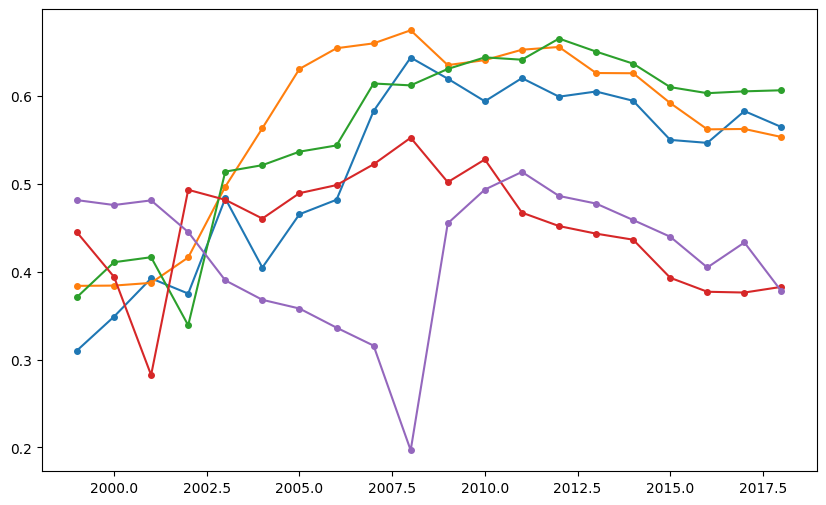

In [11]:
df.set_index('Country Name', inplace=True)  # Ustawienie nazw krajów jako indeksu
df_t = df.T  # Teraz kolumny to kraje, a wiersze to lata

# Rysowanie wykresu
plt.figure(figsize=(10, 6))  # Ustawienie wielkości wykresu

for country in df_t.columns:  # Iterowanie po krajach (kolumnach)
    plt.plot(df_t.index, df_t[country], marker='o', label=country, markersize=4)

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Dodanie tytułu, legendy i osi
plt.title("Wskaźnik OI w latach 1982-2001")
plt.xlabel("Lata")
plt.ylabel("Wartość OI")
plt.legend(title="Kraje", fontsize=8)
plt.grid(True)

# Wyświetlenie wykresu
plt.show()

